# Name: Ahmed Al Ayoubi
---

# Deep Learning Project
---

# Predicting the Prefered Foot of Soccer Players
---

####My objective in this project was to build and evaluate machine learning models for predicting a soccer player's preferred foot based on several key features, including age, skill moves, weak foot proficiency, shooting, passing, dribbling, defending, physical ability, and overall player status.

####The dataset underwent essential preprocessing steps, encoding the preferred foot as 0 for "Left" and 1 for "Right." Additionally, records with missing data in the shooting column were removed to ensure data quality.

####To tackle this classification problem, I implemented various machine learning models, including Logistic Regression, Random Forest Classification, SVM, and Deep Neural Networks (DNN). The DNN models were designed in two variations, one with dropout layers and one without, both trained using Stochastic Gradient Descent (SGD) for 5000 epochs.

####Furthermore, I explored hyperparameter tuning by creating three additional models, each with several hidden layers (5, 50, and 100). These models were also trained using SGD for 5000 epochs, allowing me to evaluate their performance and select the best configuration for predicting a player's preferred foot.

####In addition to the model analysis, a comprehensive exploration of various evaluation metrics was conducted, encompassing accuracy, precision, recall, and the F1 score—this diverse range of metrics allowed for a comprehensive assessment of model performance.

# Data Processing  

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

### Load dataset

##### DataSet Describtion:

* Player Age
* Skill Move
* Weak Foot
* Pace
* Shooting
* Passing
* Dribbling
* Defending
* Physic
* Overall Status
* Preferred Foot

[**A link for FC24 Players DataSet**](https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset)


[**FUT Website**](https://www.fut.gg/)


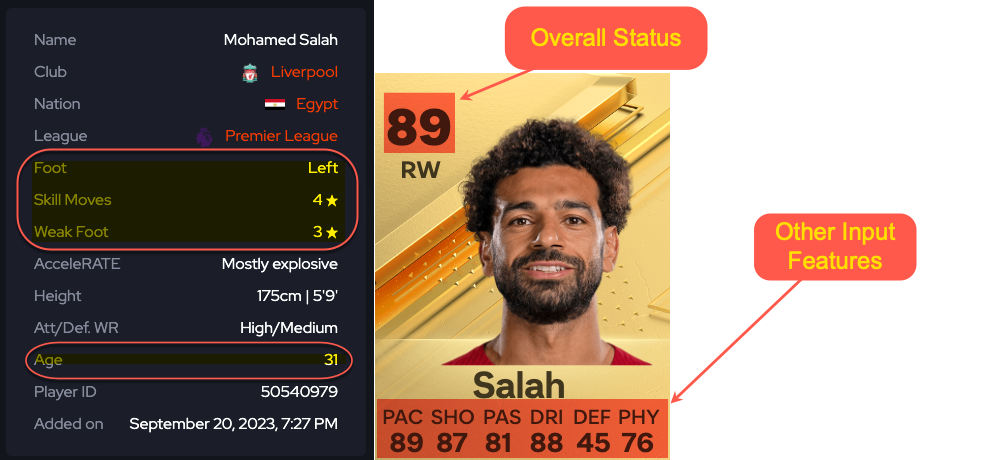

* Load and Clean the Dataset

In [ ]:
# Specify the URL and column names
url = '/content/drive/MyDrive/Colab Notebooks/COMP4531 - Deep Learning/Final Project/male_players.csv'
headers = ['age', 'skill_moves', 'weak_foot','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall', 'preferred_foot' ]

# Read the CSV file into a DataFrame
FC24_df = pd.read_csv(url)

# Keep only the desired columns
FC24_df = FC24_df[headers]

# Replace "Left" with 0 and "Right" with 1 in the "preferred_foot" column
FC24_df['preferred_foot'] = FC24_df['preferred_foot'].replace({'Left': 0, 'Right': 1})

# Rename the "preferred_foot" column to "y"
FC24_df = FC24_df.rename(columns={'preferred_foot': 'y'})

# Cleaning missing values from 'Shooting' Col.
FC24_df = FC24_df.dropna(subset=["shooting"])

FC24_df.head()

,age,skill_moves,weak_foot,pace,shooting,passing,dribbling,defending,physic,overall,y
0,32,2,3,71.0,59.0,66.0,66.0,71.0,73.0,68,0
1,32,3,3,52.0,62.0,69.0,68.0,56.0,69.0,68,1
2,32,4,4,60.0,70.0,78.0,80.0,36.0,55.0,74,1
4,30,4,4,75.0,72.0,89.0,91.0,59.0,63.0,89,1
5,31,2,4,67.0,43.0,53.0,50.0,63.0,81.0,63,1


In [ ]:
FC24_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159997 entries, 0 to 180019
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   age          159997 non-null  int64  
 1   skill_moves  159997 non-null  int64  
 2   weak_foot    159997 non-null  int64  
 3   pace         159997 non-null  float64
 4   shooting     159997 non-null  float64
 5   passing      159997 non-null  float64
 6   dribbling    159997 non-null  float64
 7   defending    159997 non-null  float64
 8   physic       159997 non-null  float64
 9   overall      159997 non-null  int64  
 10  y            159997 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 14.6 MB


In [ ]:
FC24_df.describe()

,age,skill_moves,weak_foot,pace,shooting,passing,dribbling,defending,physic,overall,y
count,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000
mean,25.017832,2.502853,2.996175,68.058839,52.268155,56.995731,62.160484,51.232742,64.824322,65.890042,0.748470
std,4.555788,0.623866,0.642219,11.063818,13.920686,10.427677,10.220788,16.580676,9.755666,6.912752,0.433894
min,16.000000,1.000000,1.000000,21.000000,14.000000,20.000000,22.000000,14.000000,27.000000,40.000000,0.000000
25%,21.000000,2.000000,3.000000,62.000000,42.000000,50.000000,56.000000,36.000000,58.000000,61.000000,0.000000
50%,25.000000,2.000000,3.000000,69.000000,54.000000,58.000000,63.000000,56.000000,66.000000,66.000000,1.000000
75%,28.000000,3.000000,3.000000,76.000000,63.000000,64.000000,69.000000,64.000000,72.000000,70.000000,1.000000
max,54.000000,5.000000,5.000000,97.000000,94.000000,94.000000,96.000000,91.000000,92.000000,94.000000,1.000000


* Data Visualization

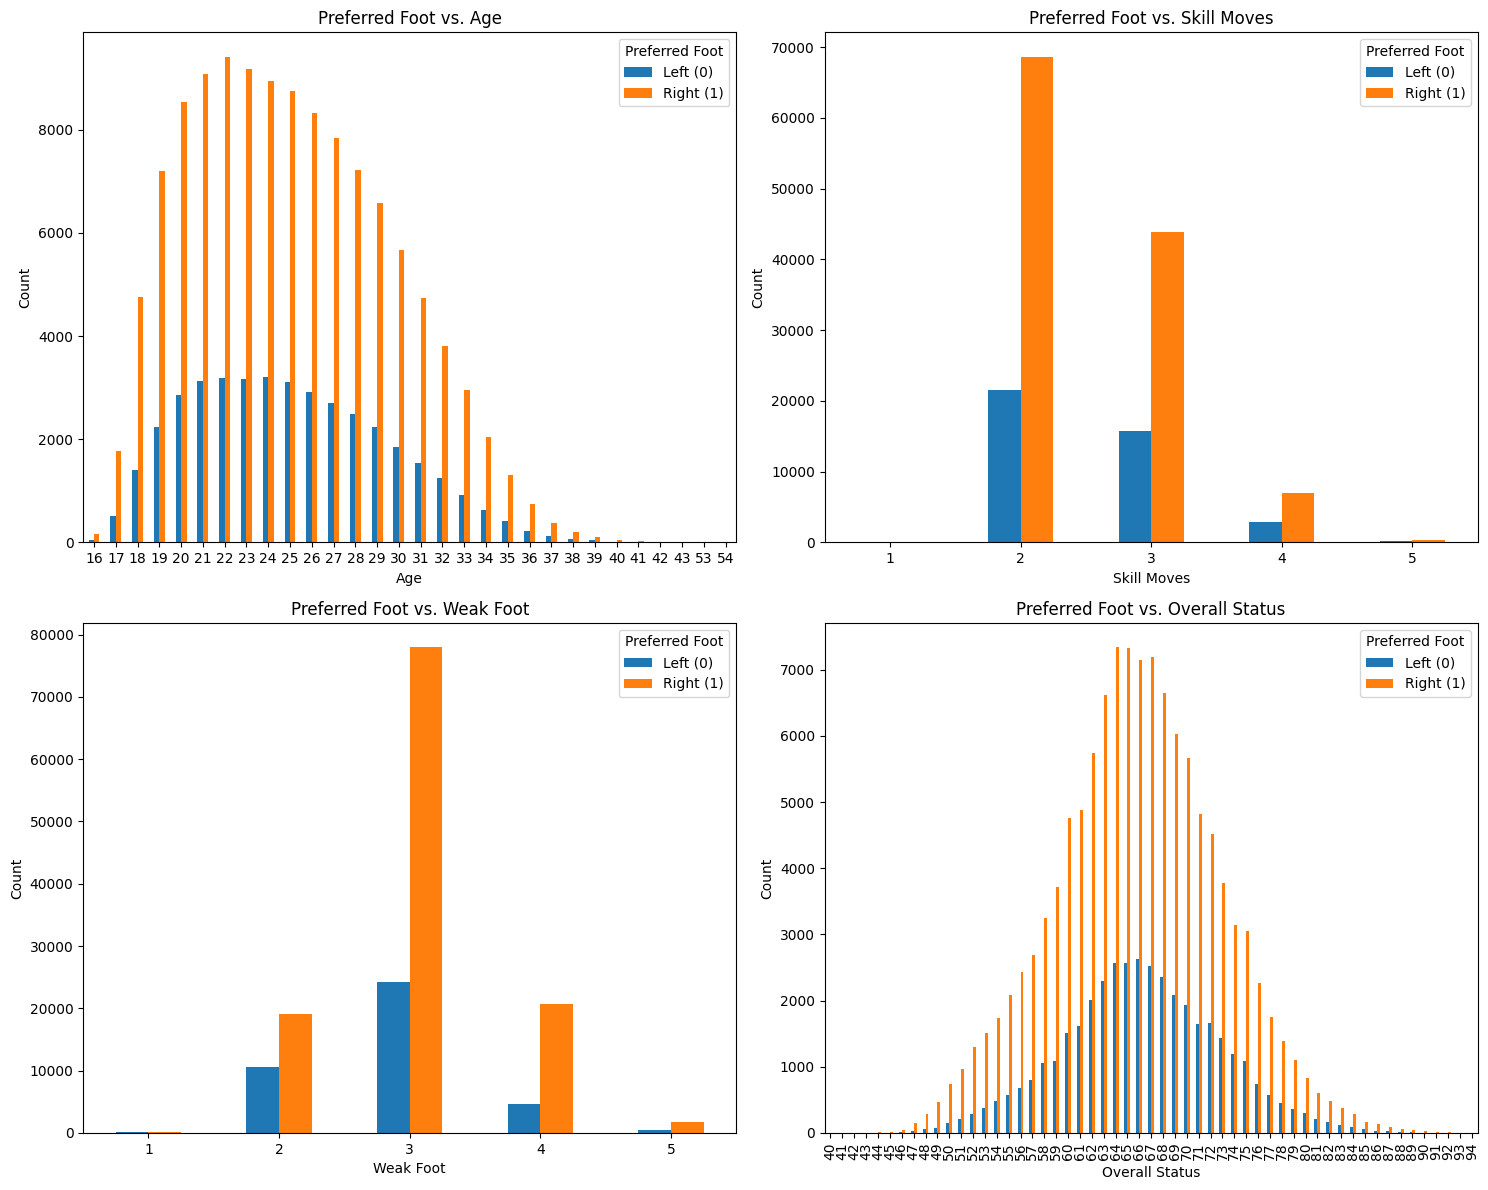

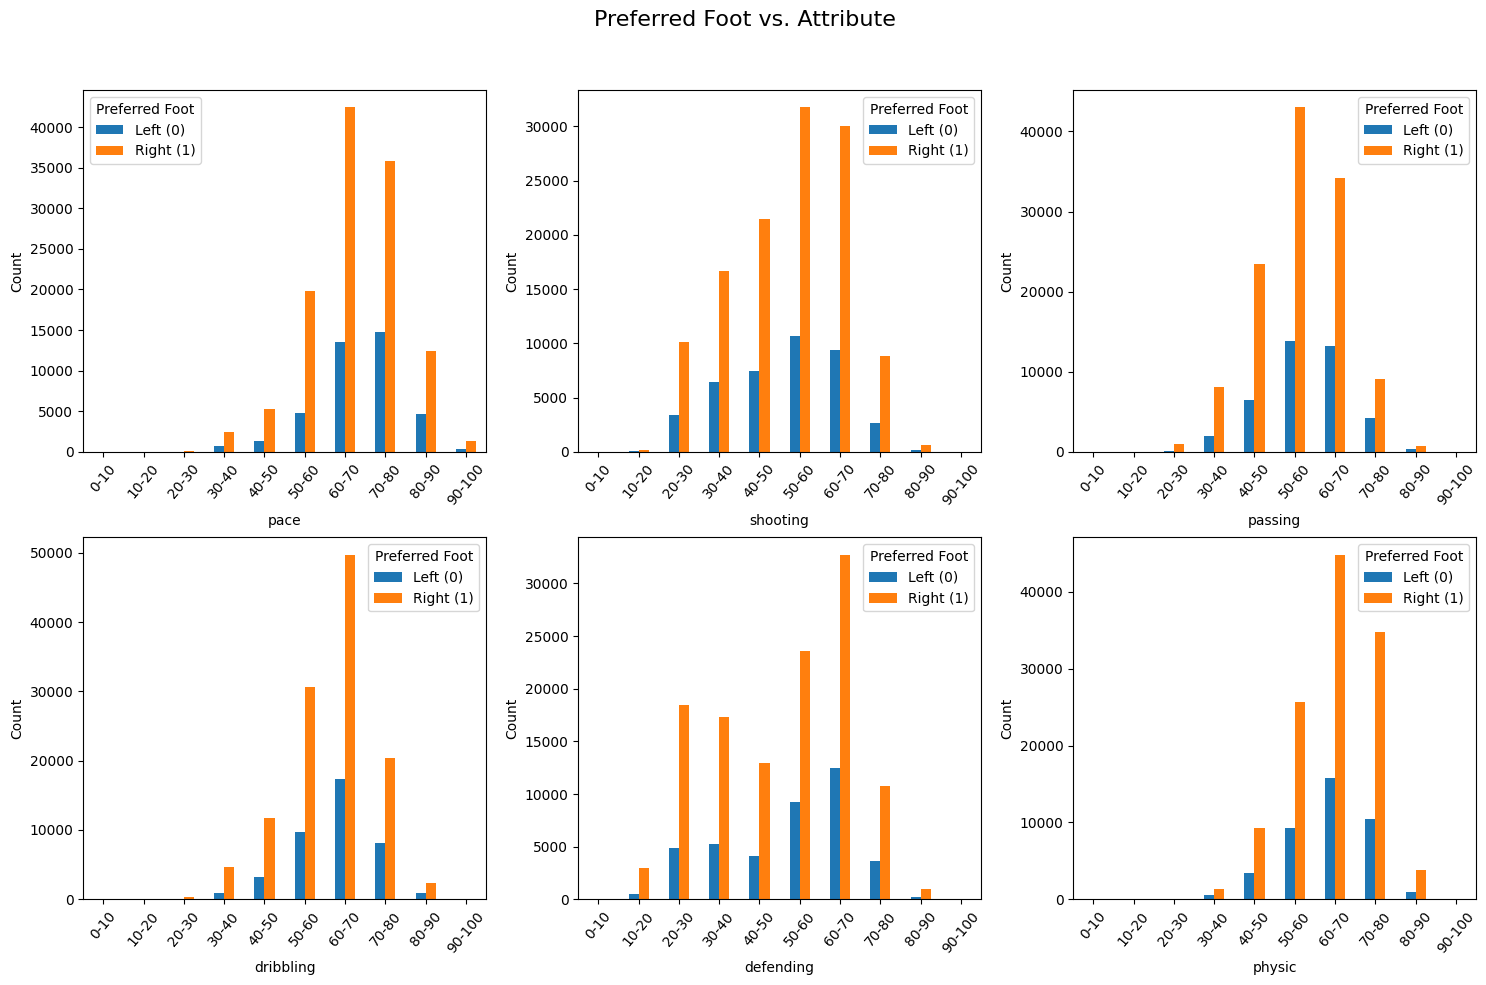

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Grouped bar plot for "y" in relation to "Age" status
grouped = FC24_df.groupby(['age', 'y']).size().unstack()
ax = grouped.plot(kind='bar', ax=axes[0, 0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Preferred Foot vs. Age")
ax.legend(title="Preferred Foot", labels=["Left (0)", "Right (1)"])

# Grouped bar plot for "y" in relation to "Skill Moves" status
grouped = FC24_df.groupby(['skill_moves', 'y']).size().unstack()
ax = grouped.plot(kind='bar', ax=axes[0, 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("Skill Moves")
ax.set_ylabel("Count")
ax.set_title("Preferred Foot vs. Skill Moves")
ax.legend(title="Preferred Foot", labels=["Left (0)", "Right (1)"])

# Grouped bar plot for "y" in relation to "Weak Foot" status
grouped = FC24_df.groupby(['weak_foot', 'y']).size().unstack()
ax = grouped.plot(kind='bar', ax=axes[1, 0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("Weak Foot")
ax.set_ylabel("Count")
ax.set_title("Preferred Foot vs. Weak Foot")
ax.legend(title="Preferred Foot", labels=["Left (0)", "Right (1)"])

# Grouped bar plot for "y" in relation to "overall" status
grouped = FC24_df.groupby(['overall', 'y']).size().unstack()
ax = grouped.plot(kind='bar', ax=axes[1, 1])
ax.set_xlabel("Overall Status")
ax.set_ylabel("Count")
ax.set_title("Preferred Foot vs. Overall Status")
ax.legend(title="Preferred Foot", labels=["Left (0)", "Right (1)"])

# Adjust subplot layout
plt.tight_layout()

# Show the combined subplot
plt.show()


# Create bins for attributes
attribute_bins = {
    'pace': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'shooting': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'passing': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'dribbling': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'defending': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'physic': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

# Labels for bins
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a single graph with separate plots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Preferred Foot vs. Attribute", fontsize=16)

for i, attribute in enumerate(attribute_bins):
    row = i // 3
    col = i % 3
    FC24_df[f'{attribute}_bins'] = pd.cut(FC24_df[attribute], bins=attribute_bins[attribute], labels=labels, include_lowest=True)
    grouped = FC24_df.groupby([f'{attribute}_bins', 'y']).size().unstack()
    ax = grouped.plot(kind='bar', ax=axes[row, col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
    ax.set_xlabel(attribute)
    ax.set_ylabel("Count")
    ax.legend(title="Preferred Foot", labels=["Left (0)", "Right (1)"])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


When comparing players' preferred foot to all input features, it becomes evident that the number of right-footed players significantly outweighs that of left-footed players. Out of approximately 160,000 players, a staggering 120,000 of them favor their right foot, while only 40,000 prefer their left foot.



*   Normalizing and Splitting the dataset into training and test sets.







In [ ]:
# Specify the URL and column names
url = '/content/drive/MyDrive/Colab Notebooks/COMP4531 - Deep Learning/Final Project/male_players.csv'
headers = ['age', 'skill_moves', 'weak_foot','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall', 'preferred_foot' ]

# Read the CSV file into a DataFrame
FC24_df = pd.read_csv(url)

# Keep only the desired columns
FC24_df = FC24_df[headers]

# Replace "Left" with 0 and "Right" with 1 in the "preferred_foot" column
FC24_df['preferred_foot'] = FC24_df['preferred_foot'].replace({'Left': 0, 'Right': 1})

# Rename the "preferred_foot" column to "y"
FC24_df = FC24_df.rename(columns={'preferred_foot': 'y'})

# Cleaning missing values from 'Shooting' Col.
FC24_df = FC24_df.dropna(subset=["shooting"])

# Convert pandas dataframe into numpy arrays
x = FC24_df.drop(columns=['y']).values[1:]
y_label = FC24_df['y'].values[1:].reshape(x.shape[0], 1).astype(float)

# Split data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.2, random_state=2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=2)

# Standardize the datasets
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

print("Shape of train set is {}".format(x_train.shape))
print("Shape of validation set is {}".format(x_val.shape))
print("Shape of test set is {}".format(x_test.shape))
print("Shape of train label is {}".format(y_train.shape))
print("Shape of validation label is {}".format(y_val.shape))
print("Shape of test labels is {}".format(y_test.shape))

# Convert numpy arrays to PyTorch tensors
X_train = torch.FloatTensor(x_train)
Y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(x_val)
Y_val = torch.FloatTensor(y_val)
X_test = torch.FloatTensor(x_test)
Y_test = torch.FloatTensor(y_test)

Shape of train set is (127996, 10)
Shape of validation set is (16000, 10)
Shape of test set is (16000, 10)
Shape of train label is (127996, 1)
Shape of validation label is (16000, 1)
Shape of test labels is (16000, 1)


# Model Selection and Evaluation:

###Logistic Regression



In [ ]:
# Step 1: Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

# Create the model
input_size = x_train.shape[1]
model = LogisticRegressionModel(input_size)

# Step 2: Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Store losses during training
train_losses = []
val_losses = []
test_losses = []

# Step 3: Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Calculate validation loss
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, Y_val)
        val_losses.append(val_loss.item())

        # Calculate test loss
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, Y_test)
        test_losses.append(test_loss.item())

# Step 4: Calculate and print accuracies, precision, recall, and F1 Score
with torch.no_grad():
    # Training accuracy
    predicted_train = model(X_train)
    predicted_train = (predicted_train > 0.5).float()
    train_accuracy = (predicted_train == Y_train).sum().item() / len(Y_train)
    train_precision = precision_score(Y_train, predicted_train)
    train_recall = recall_score(Y_train, predicted_train)
    train_f1 = f1_score(Y_train, predicted_train)
    print("Logistic Regression")
    print("Training Accuracy: {:.2f}".format(train_accuracy))
    print("Training Precision: {:.2f}".format(train_precision))
    print("Training Recall: {:.2f}".format(train_recall))
    print("Training F1 Score: {:.2f}".format(train_f1))
    print("\n")

    # Validation accuracy
    predicted_val = model(X_val)
    predicted_val = (predicted_val > 0.5).float()
    val_accuracy = (predicted_val == Y_val).sum().item() / len(Y_val)
    val_precision = precision_score(Y_val, predicted_val)
    val_recall = recall_score(Y_val, predicted_val)
    val_f1 = f1_score(Y_val, predicted_val)
    print("Validation Accuracy: {:.2f}".format(val_accuracy))
    print("Validation Precision: {:.2f}".format(val_precision))
    print("Validation Recall: {:.2f}".format(val_recall))
    print("Validation F1 Score: {:.2f}".format(val_f1))
    print("\n")

    # Test accuracy
    predicted_test = model(X_test)
    predicted_test = (predicted_test > 0.5).float()
    test_accuracy = (predicted_test == Y_test).sum().item() / len(Y_test)
    test_precision = precision_score(Y_test, predicted_test)
    test_recall = recall_score(Y_test, predicted_test)
    test_f1 = f1_score(Y_test, predicted_test)
    print("Test Accuracy: {:.2f}".format(test_accuracy))
    print("Test Precision: {:.2f}".format(test_precision))
    print("Test Recall: {:.2f}".format(test_recall))
    print("Test F1 Score: {:.2f}".format(test_f1))

Logistic Regression
Training Accuracy: 0.75
Training Precision: 0.75
Training Recall: 1.00
Training F1 Score: 0.86


Validation Accuracy: 0.75
Validation Precision: 0.75
Validation Recall: 1.00
Validation F1 Score: 0.86


Test Accuracy: 0.75
Test Precision: 0.75
Test Recall: 1.00
Test F1 Score: 0.86



* In summary, the Logistic Regression model demonstrates consistent and balanced performance on all three datasets with good accuracy, precision, recall, and F1 score. The model shows promise in correctly classifying instances and capturing all positive cases, making it a robust and reliable classifier for the given task.

###Random Forest Classifier

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the model on the training data
rf_classifier.fit(x_train, y_train.ravel())

# Make predictions on the training, validation, and test data
y_train_pred = rf_classifier.predict(x_train)
y_val_pred = rf_classifier.predict(x_val)
y_test_pred = rf_classifier.predict(x_test)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate accuracy on the validation data
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_precision = precision_score(y_val, y_val_pred)
validation_recall = recall_score(y_val, y_val_pred)
validation_f1 = f1_score(y_val, y_val_pred)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Random Forest")
print("Train Accuracy: {:.2f}".format(train_accuracy))
print("Train Precision: {:.2f}".format(train_precision))
print("Train Recall: {:.2f}".format(train_recall))
print("Train F1 Score: {:.2f}".format(train_f1))
print("\n")
print("Validation Accuracy: {:.2f}".format(validation_accuracy))
print("Validation Precision: {:.2f}".format(validation_precision))
print("Validation Recall: {:.2f}".format(validation_recall))
print("Validation F1 Score: {:.2f}".format(validation_f1))
print("\n")
print("Test Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Test F1 Score: {:.2f}".format(test_f1))

Random Forest
Train Accuracy: 1.00
Train Precision: 1.00
Train Recall: 1.00
Train F1 Score: 1.00


Validation Accuracy: 0.80
Validation Precision: 0.81
Validation Recall: 0.97
Validation F1 Score: 0.88


Test Accuracy: 0.81
Test Precision: 0.81
Test Recall: 0.97
Test F1 Score: 0.88


* In summary, the Random Forest model performed exceptionally well on the training set, achieving perfect accuracy, precision, recall, and F1 score. While it exhibited a slightly lower accuracy on the validation and test sets, it maintained strong precision, recall, and F1 score, suggesting that it generalizes well to new data. The model is particularly good at correctly identifying positive instances (high recall) and making accurate positive predictions (high precision). Overall, it appears to be a robust and reliable model for the given task.

###SVM

In [ ]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm_model.fit(x_train, y_train.ravel())

# Predict on the training set
svm_train_predictions = svm_model.predict(x_train)

# Evaluate the accuracy on the training set
train_accuracy = accuracy_score(y_train, svm_train_predictions)
train_precision = precision_score(y_train, svm_train_predictions)
train_recall = recall_score(y_train, svm_train_predictions)
train_f1 = f1_score(y_train, svm_train_predictions)

# Predict on the validation set
svm_val_predictions = svm_model.predict(x_val)

# Evaluate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, svm_val_predictions)
val_precision = precision_score(y_val, svm_val_predictions)
val_recall = recall_score(y_val, svm_val_predictions)
val_f1 = f1_score(y_val, svm_val_predictions)

# Predict on the test set
svm_test_predictions = svm_model.predict(x_test)

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, svm_test_predictions)
test_precision = precision_score(y_test, svm_test_predictions)
test_recall = recall_score(y_test, svm_test_predictions)
test_f1 = f1_score(y_test, svm_test_predictions)

print("SVM")
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Training Precision: {:.2f}".format(train_precision))
print("Training Recall: {:.2f}".format(train_recall))
print("Training F1 Score: {:.2f}".format(train_f1))
print("\n")
print("Validation Accuracy: {:.2f}".format(val_accuracy))
print("Validation Precision: {:.2f}".format(val_precision))
print("Validation Recall: {:.2f}".format(val_recall))
print("Validation F1 Score: {:.2f}".format(val_f1))
print("\n")
print("Test Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Test F1 Score: {:.2f}".format(test_f1))

SVM
Training Accuracy: 0.75
Training Precision: 0.75
Training Recall: 1.00
Training F1 Score: 0.86


Validation Accuracy: 0.75
Validation Precision: 0.75
Validation Recall: 1.00
Validation F1 Score: 0.85


Test Accuracy: 0.75
Test Precision: 0.75
Test Recall: 1.00
Test F1 Score: 0.86


* In summary, the SVM model demonstrates a consistent and balanced performance across the training, validation, and test datasets. It maintains a 75% accuracy, indicating a relatively reliable prediction. The high recall suggests that the model can effectively identify players with their actual preferred foot, and the F1 Score validates the good balance between precision and recall. Therefore, this SVM model seems to be performing well in predicting the preferred foot of players in your dataset.

###Deep Neural Network

In [ ]:
# Define the Neural Network using PyTorch
class PyTorchNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        super(PyTorchNeuralNetwork, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Invalid activation function")

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

    def predict(self, X):
        with torch.no_grad():
            outputs = self.forward(X)
            return (outputs > 0.5).float()

# Function to train the model and return losses, validation losses, and test losses
def train_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate=0.01, epochs=5000):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    losses = []
    val_losses = []  # Validation loss tracking
    test_losses = []  # Test loss tracking

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        # Calculate validation loss
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, Y_val)
        val_losses.append(val_loss.item())

        # Calculate test loss
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, Y_test)
        test_losses.append(test_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    return losses, val_losses, test_losses

# Function to calculate accuracy
def accuracy(y, y_hat):
    acc = torch.sum(y == y_hat).item() / len(y)
    return acc

### Creating models and training them without Dropout and with Dropout:

* Input Size is 10
* Hidden Size is 5
* Output Size is 1
* Activation is Leaky Relu
* Optimaizer is SGD
* Learning Rate is 0.01
* Epochs is 5000
* The model with a Dropout Probability of 0.5





In [ ]:
# Create a model without dropout
model_without_dropout = PyTorchNeuralNetwork(input_size=10, hidden_size=5, output_size=1, activation='leaky_relu')

# Create a model with dropout (probability 0.5%)
model_with_dropout = PyTorchNeuralNetwork(input_size=10, hidden_size=5, output_size=1, activation='leaky_relu')
model_with_dropout.dropout = nn.Dropout(p=0.5)

In [ ]:
# Train and evaluate the model without dropout
losses_without_dropout, val_losses_without_dropout, test_losses_without_dropout = train_model(model_without_dropout, X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate=0.01, epochs=5000)

train_pred_without_dropout = model_without_dropout.predict(X_train)
val_pred_without_dropout = model_without_dropout.predict(X_val)
test_pred_without_dropout = model_without_dropout.predict(X_test)

print("Model without dropout:")
print("Train accuracy is {:.2f}".format(accuracy(Y_train, train_pred_without_dropout)))
print("Validation accuracy is {:.2f}".format(accuracy(Y_val, val_pred_without_dropout)))
print("Test accuracy is {:.2f}".format(accuracy(Y_test, test_pred_without_dropout)))

Epoch [100/5000], Loss: 0.6009, Val Loss: 0.6023, Test Loss: 0.5971
Epoch [200/5000], Loss: 0.5853, Val Loss: 0.5871, Test Loss: 0.5819
Epoch [300/5000], Loss: 0.5761, Val Loss: 0.5782, Test Loss: 0.5730
Epoch [400/5000], Loss: 0.5701, Val Loss: 0.5724, Test Loss: 0.5674
Epoch [500/5000], Loss: 0.5661, Val Loss: 0.5685, Test Loss: 0.5636
Epoch [600/5000], Loss: 0.5632, Val Loss: 0.5657, Test Loss: 0.5609
Epoch [700/5000], Loss: 0.5611, Val Loss: 0.5636, Test Loss: 0.5590
Epoch [800/5000], Loss: 0.5595, Val Loss: 0.5621, Test Loss: 0.5575
Epoch [900/5000], Loss: 0.5582, Val Loss: 0.5608, Test Loss: 0.5563
Epoch [1000/5000], Loss: 0.5572, Val Loss: 0.5598, Test Loss: 0.5553
Epoch [1100/5000], Loss: 0.5563, Val Loss: 0.5589, Test Loss: 0.5544
Epoch [1200/5000], Loss: 0.5555, Val Loss: 0.5582, Test Loss: 0.5537
Epoch [1300/5000], Loss: 0.5548, Val Loss: 0.5575, Test Loss: 0.5530
Epoch [1400/5000], Loss: 0.5542, Val Loss: 0.5569, Test Loss: 0.5524
Epoch [1500/5000], Loss: 0.5536, Val Loss: 

In [ ]:
# Train and evaluate the model with dropout
losses_with_dropout, val_losses_with_dropout, test_losses_with_dropout = train_model(model_with_dropout, X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate=0.07, epochs=5000)

train_pred_with_dropout = model_with_dropout.predict(X_train)
val_pred_with_dropout = model_with_dropout.predict(X_val)
test_pred_with_dropout = model_with_dropout.predict(X_test)

print("Model with dropout:")
print("Train accuracy is {:.2f}".format(accuracy(Y_train, train_pred_with_dropout)))
print("Validation accuracy is {:.2f}".format(accuracy(Y_val, val_pred_with_dropout)))
print("Test accuracy is {:.2f}".format(accuracy(Y_test, test_pred_with_dropout)))

Epoch [100/5000], Loss: 0.5633, Val Loss: 0.5651, Test Loss: 0.5642
Epoch [200/5000], Loss: 0.5525, Val Loss: 0.5543, Test Loss: 0.5521
Epoch [300/5000], Loss: 0.5495, Val Loss: 0.5515, Test Loss: 0.5485
Epoch [400/5000], Loss: 0.5479, Val Loss: 0.5501, Test Loss: 0.5467
Epoch [500/5000], Loss: 0.5466, Val Loss: 0.5491, Test Loss: 0.5453
Epoch [600/5000], Loss: 0.5455, Val Loss: 0.5482, Test Loss: 0.5442
Epoch [700/5000], Loss: 0.5446, Val Loss: 0.5474, Test Loss: 0.5433
Epoch [800/5000], Loss: 0.5437, Val Loss: 0.5467, Test Loss: 0.5425
Epoch [900/5000], Loss: 0.5429, Val Loss: 0.5460, Test Loss: 0.5418
Epoch [1000/5000], Loss: 0.5421, Val Loss: 0.5454, Test Loss: 0.5411
Epoch [1100/5000], Loss: 0.5414, Val Loss: 0.5448, Test Loss: 0.5404
Epoch [1200/5000], Loss: 0.5407, Val Loss: 0.5442, Test Loss: 0.5397
Epoch [1300/5000], Loss: 0.5401, Val Loss: 0.5437, Test Loss: 0.5391
Epoch [1400/5000], Loss: 0.5395, Val Loss: 0.5432, Test Loss: 0.5386
Epoch [1500/5000], Loss: 0.5389, Val Loss: 

In [ ]:
# Calculate precision, recall, and F1 score
# For Neural Network without dropout
train_precision_nn_without_dropout = precision_score(Y_train, train_pred_without_dropout)
train_recall_nn_without_dropout = recall_score(Y_train, train_pred_without_dropout)
train_f1_nn_without_dropout = f1_score(Y_train, train_pred_without_dropout)

val_precision_nn_without_dropout = precision_score(Y_val, val_pred_without_dropout)
val_recall_nn_without_dropout = recall_score(Y_val, val_pred_without_dropout)
val_f1_nn_without_dropout = f1_score(Y_val, val_pred_without_dropout)

test_precision_nn_without_dropout = precision_score(Y_test, test_pred_without_dropout)
test_recall_nn_without_dropout = recall_score(Y_test, test_pred_without_dropout)
test_f1_nn_without_dropout = f1_score(Y_test, test_pred_without_dropout)

# For Neural Network with dropout
train_precision_nn_with_dropout = precision_score(Y_train, train_pred_with_dropout)
train_recall_nn_with_dropout = recall_score(Y_train, train_pred_with_dropout)
train_f1_nn_with_dropout = f1_score(Y_train, train_pred_with_dropout)

val_precision_nn_with_dropout = precision_score(Y_val, val_pred_with_dropout)
val_recall_nn_with_dropout = recall_score(Y_val, val_pred_with_dropout)
val_f1_nn_with_dropout = f1_score(Y_val, val_pred_with_dropout)

test_precision_nn_with_dropout = precision_score(Y_test, test_pred_with_dropout)
test_recall_nn_with_dropout = recall_score(Y_test, test_pred_with_dropout)
test_f1_nn_with_dropout = f1_score(Y_test, test_pred_with_dropout)

# Print the results
print("Neural Network without dropout:")
print("Training - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(train_precision_nn_without_dropout, train_recall_nn_without_dropout, train_f1_nn_without_dropout))
print("Validation - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(val_precision_nn_without_dropout, val_recall_nn_without_dropout, val_f1_nn_without_dropout))
print("Test - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(test_precision_nn_without_dropout, test_recall_nn_without_dropout, test_f1_nn_without_dropout))
print("\n")
print("Neural Network with dropout:")
print("Training - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(train_precision_nn_with_dropout, train_recall_nn_with_dropout, train_f1_nn_with_dropout))
print("Validation - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(val_precision_nn_with_dropout, val_recall_nn_with_dropout, val_f1_nn_with_dropout))
print("Test - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(test_precision_nn_with_dropout, test_recall_nn_with_dropout, test_f1_nn_with_dropout))

Neural Network without dropout:
Training - Precision: 0.75, Recall: 1.00, F1 Score: 0.86
Validation - Precision: 0.75, Recall: 1.00, F1 Score: 0.85
Test - Precision: 0.75, Recall: 1.00, F1 Score: 0.86


Neural Network with dropout:
Training - Precision: 0.76, Recall: 0.98, F1 Score: 0.86
Validation - Precision: 0.76, Recall: 0.98, F1 Score: 0.86
Test - Precision: 0.76, Recall: 0.98, F1 Score: 0.86


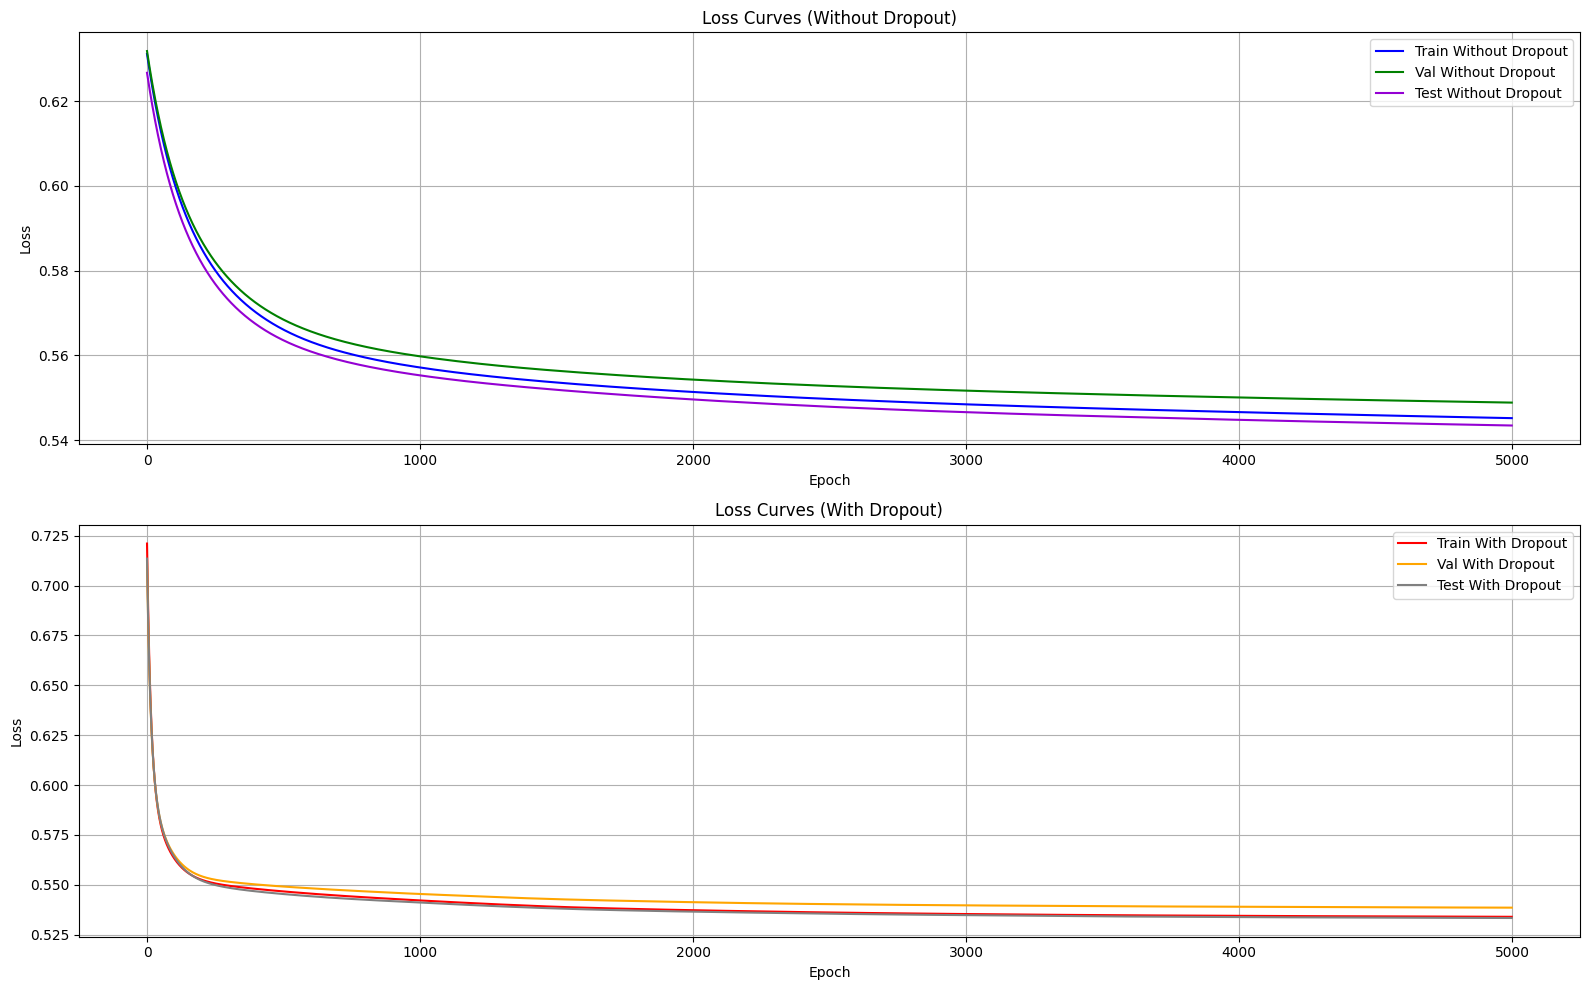

In [ ]:
# Plot the loss curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Plot loss curves for the model without dropout
ax1.plot(losses_without_dropout, label="Train Without Dropout", color='blue')
ax1.plot(val_losses_without_dropout, label="Val Without Dropout", color='green')
ax1.plot(test_losses_without_dropout, label="Test Without Dropout", color='DarkViolet')
ax1.set_title("Loss Curves (Without Dropout)")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Plot loss curves for the model with dropout
ax2.plot(losses_with_dropout, label="Train With Dropout", color='red')
ax2.plot(val_losses_with_dropout, label="Val With Dropout", color='orange')
ax2.plot(test_losses_with_dropout, label="Test With Dropout", color='gray')
ax2.set_title("Loss Curves (With Dropout)")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* Both DNN models (with and without dropout) show reasonably good accuracy on the training, validation, and test sets, with accuracy scores ranging from 0.75 to 0.76.
* The models demonstrate high recall values, especially for the training and test sets, indicating that they are effective at correctly identifying the positive class.
* The F1 Score, which combines both precision and recall, is consistent across training, validation, and test sets for both models, indicating a balance between precision and recall.
* The model with dropout performs slightly better in terms of precision, recall, and F1 Score on the validation set, showing better generalization capability. However, it is important to note that the improvements are modest.


In summary, both DNN models perform well in terms of accuracy and the ability to identify the positive class. The model with dropout shows a slight improvement in generalization, but both models are suitable for the given classification task.

### Hyperparameter Tuning:

* Input Size is 10
* Hidden Size is 5, 50, 100
* Output Size is 1
* Activation is Leaky Relu
* Optimaizer is SGD
* Learning Rate is 0.01
* Epochs is 5000

In [ ]:
# Create models with different numbers of hidden layers
model_5_layers = PyTorchNeuralNetwork(input_size=10, hidden_size=5, output_size=1, activation='leaky_relu')
model_50_layers = PyTorchNeuralNetwork(input_size=10, hidden_size=50, output_size=1, activation='leaky_relu')
model_100_layers = PyTorchNeuralNetwork(input_size=10, hidden_size=100, output_size=1, activation='leaky_relu')

* Training three models with varying hidden layer sizes: 5, 50, and 100.

In [ ]:
# Train and evaluate the model with 5 hidden layers
losses_5_layers, val_losses_5_layers, test_losses_5_layers = train_model(model_5_layers, X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate=0.01, epochs=5000)

train_pred_5_layers = model_5_layers.predict(X_train)
val_pred_5_layers = model_5_layers.predict(X_val)
test_pred_5_layers = model_5_layers.predict(X_test)

print("Model with 5 hidden layers:")
print("Train accuracy is {:.2f}".format(accuracy(Y_train, train_pred_5_layers)))
print("Validation accuracy is {:.2f}".format(accuracy(Y_val, val_pred_5_layers)))
print("Test accuracy is {:.2f}".format(accuracy(Y_test, test_pred_5_layers)))

Epoch [100/5000], Loss: 0.6208, Val Loss: 0.6209, Test Loss: 0.6199
Epoch [200/5000], Loss: 0.5956, Val Loss: 0.5965, Test Loss: 0.5947
Epoch [300/5000], Loss: 0.5827, Val Loss: 0.5841, Test Loss: 0.5817
Epoch [400/5000], Loss: 0.5755, Val Loss: 0.5773, Test Loss: 0.5744
Epoch [500/5000], Loss: 0.5710, Val Loss: 0.5731, Test Loss: 0.5700
Epoch [600/5000], Loss: 0.5680, Val Loss: 0.5702, Test Loss: 0.5670
Epoch [700/5000], Loss: 0.5657, Val Loss: 0.5680, Test Loss: 0.5647
Epoch [800/5000], Loss: 0.5639, Val Loss: 0.5663, Test Loss: 0.5628
Epoch [900/5000], Loss: 0.5623, Val Loss: 0.5648, Test Loss: 0.5613
Epoch [1000/5000], Loss: 0.5609, Val Loss: 0.5634, Test Loss: 0.5599
Epoch [1100/5000], Loss: 0.5597, Val Loss: 0.5623, Test Loss: 0.5586
Epoch [1200/5000], Loss: 0.5587, Val Loss: 0.5613, Test Loss: 0.5575
Epoch [1300/5000], Loss: 0.5577, Val Loss: 0.5604, Test Loss: 0.5566
Epoch [1400/5000], Loss: 0.5569, Val Loss: 0.5595, Test Loss: 0.5557
Epoch [1500/5000], Loss: 0.5561, Val Loss: 

In [ ]:
# Train and evaluate the model with 50 hidden layers
losses_50_layers, val_losses_50_layers, test_losses_50_layers = train_model(model_50_layers, X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate=0.01, epochs=5000)

train_pred_50_layers = model_50_layers.predict(X_train)
val_pred_50_layers = model_50_layers.predict(X_val)
test_pred_50_layers = model_50_layers.predict(X_test)

print("Model with 50 hidden layers:")
print("Train accuracy is {:.2f}".format(accuracy(Y_train, train_pred_50_layers)))
print("Validation accuracy is {:.2f}".format(accuracy(Y_val, val_pred_50_layers)))
print("Test accuracy is {:.2f}".format(accuracy(Y_test, test_pred_50_layers)))

Epoch [100/5000], Loss: 0.5829, Val Loss: 0.5843, Test Loss: 0.5817
Epoch [200/5000], Loss: 0.5666, Val Loss: 0.5685, Test Loss: 0.5655
Epoch [300/5000], Loss: 0.5613, Val Loss: 0.5635, Test Loss: 0.5603
Epoch [400/5000], Loss: 0.5582, Val Loss: 0.5606, Test Loss: 0.5572
Epoch [500/5000], Loss: 0.5558, Val Loss: 0.5583, Test Loss: 0.5548
Epoch [600/5000], Loss: 0.5538, Val Loss: 0.5564, Test Loss: 0.5528
Epoch [700/5000], Loss: 0.5520, Val Loss: 0.5548, Test Loss: 0.5511
Epoch [800/5000], Loss: 0.5505, Val Loss: 0.5534, Test Loss: 0.5495
Epoch [900/5000], Loss: 0.5492, Val Loss: 0.5522, Test Loss: 0.5482
Epoch [1000/5000], Loss: 0.5480, Val Loss: 0.5511, Test Loss: 0.5470
Epoch [1100/5000], Loss: 0.5470, Val Loss: 0.5502, Test Loss: 0.5460
Epoch [1200/5000], Loss: 0.5461, Val Loss: 0.5493, Test Loss: 0.5451
Epoch [1300/5000], Loss: 0.5453, Val Loss: 0.5486, Test Loss: 0.5443
Epoch [1400/5000], Loss: 0.5446, Val Loss: 0.5479, Test Loss: 0.5435
Epoch [1500/5000], Loss: 0.5439, Val Loss: 

In [ ]:
# Train and evaluate the model with 100 hidden layers
losses_100_layers, val_losses_100_layers, test_losses_100_layers = train_model(model_100_layers, X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate=0.01, epochs=5000)

train_pred_100_layers = model_100_layers.predict(X_train)
val_pred_100_layers = model_100_layers.predict(X_val)
test_pred_100_layers = model_100_layers.predict(X_test)

print("Model with 100 hidden layers:")
print("Train accuracy is {:.2f}".format(accuracy(Y_train, train_pred_100_layers)))
print("Validation accuracy is {:.2f}".format(accuracy(Y_val, val_pred_100_layers)))
print("Test accuracy is {:.2f}".format(accuracy(Y_test, test_pred_100_layers)))

Epoch [100/5000], Loss: 0.5715, Val Loss: 0.5726, Test Loss: 0.5701
Epoch [200/5000], Loss: 0.5616, Val Loss: 0.5634, Test Loss: 0.5603
Epoch [300/5000], Loss: 0.5576, Val Loss: 0.5595, Test Loss: 0.5563
Epoch [400/5000], Loss: 0.5547, Val Loss: 0.5567, Test Loss: 0.5534
Epoch [500/5000], Loss: 0.5524, Val Loss: 0.5546, Test Loss: 0.5511
Epoch [600/5000], Loss: 0.5506, Val Loss: 0.5529, Test Loss: 0.5494
Epoch [700/5000], Loss: 0.5492, Val Loss: 0.5516, Test Loss: 0.5480
Epoch [800/5000], Loss: 0.5481, Val Loss: 0.5506, Test Loss: 0.5468
Epoch [900/5000], Loss: 0.5472, Val Loss: 0.5497, Test Loss: 0.5459
Epoch [1000/5000], Loss: 0.5464, Val Loss: 0.5490, Test Loss: 0.5451
Epoch [1100/5000], Loss: 0.5458, Val Loss: 0.5484, Test Loss: 0.5444
Epoch [1200/5000], Loss: 0.5452, Val Loss: 0.5479, Test Loss: 0.5439
Epoch [1300/5000], Loss: 0.5447, Val Loss: 0.5475, Test Loss: 0.5433
Epoch [1400/5000], Loss: 0.5443, Val Loss: 0.5471, Test Loss: 0.5429
Epoch [1500/5000], Loss: 0.5439, Val Loss: 

In [ ]:
# Calculate precision, recall, and F1 score

# For Neural Network with 5 hidden layers
train_precision_nn_5_layers = precision_score(Y_train, train_pred_5_layers)
train_recall_nn_5_layers = recall_score(Y_train, train_pred_5_layers)
train_f1_nn_5_layers = f1_score(Y_train, train_pred_5_layers)

val_precision_nn_5_layers = precision_score(Y_val, val_pred_5_layers)
val_recall_nn_5_layers = recall_score(Y_val, val_pred_5_layers)
val_f1_nn_5_layers = f1_score(Y_val, val_pred_5_layers)

test_precision_nn_5_layers = precision_score(Y_test, test_pred_5_layers)
test_recall_nn_5_layers = recall_score(Y_test, test_pred_5_layers)
test_f1_nn_5_layers = f1_score(Y_test, test_pred_5_layers)

# For Neural Network with 50 hidden layers
train_precision_nn_50_layers = precision_score(Y_train, train_pred_50_layers)
train_recall_nn_50_layers = recall_score(Y_train, train_pred_50_layers)
train_f1_nn_50_layers = f1_score(Y_train, train_pred_50_layers)

val_precision_nn_50_layers = precision_score(Y_val, val_pred_50_layers)
val_recall_nn_50_layers = recall_score(Y_val, val_pred_50_layers)
val_f1_nn_50_layers = f1_score(Y_val, val_pred_50_layers)

test_precision_nn_50_layers = precision_score(Y_test, test_pred_50_layers)
test_recall_nn_50_layers = recall_score(Y_test, test_pred_50_layers)
test_f1_nn_50_layers = f1_score(Y_test, test_pred_50_layers)

# For Neural Network with 100 hidden layers
train_precision_nn_100_layers = precision_score(Y_train, train_pred_100_layers)
train_recall_nn_100_layers = recall_score(Y_train, train_pred_100_layers)
train_f1_nn_100_layers = f1_score(Y_train, train_pred_100_layers)

val_precision_nn_100_layers = precision_score(Y_val, val_pred_100_layers)
val_recall_nn_100_layers = recall_score(Y_val, val_pred_100_layers)
val_f1_nn_100_layers = f1_score(Y_val, val_pred_100_layers)

test_precision_nn_100_layers = precision_score(Y_test, test_pred_100_layers)
test_recall_nn_100_layers = recall_score(Y_test, test_pred_100_layers)
test_f1_nn_100_layers = f1_score(Y_test, test_pred_100_layers)

# Print the precision, recall, and F1 score for each model and dataset
print("Neural Network with 5 hidden layers:")
print("Training - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(train_precision_nn_5_layers, train_recall_nn_5_layers, train_f1_nn_5_layers))
print("Validation - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(val_precision_nn_5_layers, val_recall_nn_5_layers, val_f1_nn_5_layers))
print("Test - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(test_precision_nn_5_layers, test_recall_nn_5_layers, test_f1_nn_5_layers))
print("\n")
print("Neural Network with 50 hidden layers:")
print("Training - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(train_precision_nn_50_layers, train_recall_nn_50_layers, train_f1_nn_50_layers))
print("Validation - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(val_precision_nn_50_layers, val_recall_nn_50_layers, val_f1_nn_50_layers))
print("Test - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(test_precision_nn_50_layers, test_recall_nn_50_layers, test_f1_nn_50_layers))
print("\n")
print("Neural Network with 100 hidden layers:")
print("Training - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(train_precision_nn_100_layers, train_recall_nn_100_layers, train_f1_nn_100_layers))
print("Validation - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(val_precision_nn_100_layers, val_recall_nn_100_layers, val_f1_nn_100_layers))
print("Test - Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(test_precision_nn_100_layers, test_recall_nn_100_layers, test_f1_nn_100_layers))

Neural Network with 5 hidden layers:
Training - Precision: 0.75, Recall: 1.00, F1 Score: 0.86
Validation - Precision: 0.75, Recall: 1.00, F1 Score: 0.85
Test - Precision: 0.75, Recall: 1.00, F1 Score: 0.86


Neural Network with 50 hidden layers:
Training - Precision: 0.76, Recall: 0.99, F1 Score: 0.86
Validation - Precision: 0.76, Recall: 0.99, F1 Score: 0.86
Test - Precision: 0.76, Recall: 0.99, F1 Score: 0.86


Neural Network with 100 hidden layers:
Training - Precision: 0.76, Recall: 0.99, F1 Score: 0.86
Validation - Precision: 0.75, Recall: 0.99, F1 Score: 0.86
Test - Precision: 0.76, Recall: 0.99, F1 Score: 0.86


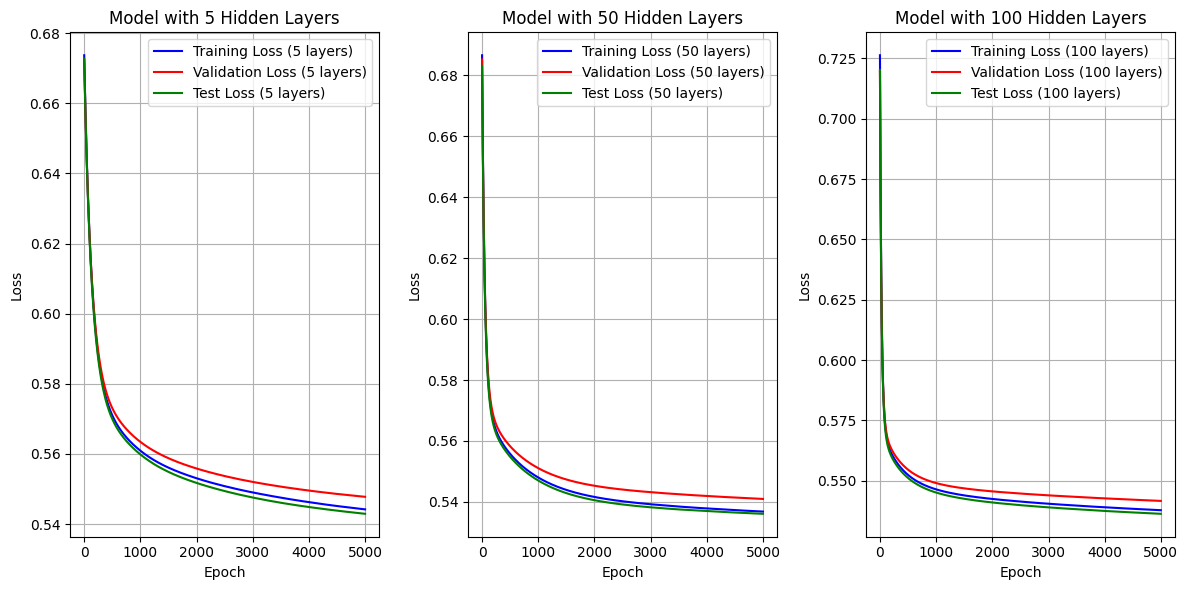

In [ ]:
# Plot the loss curves
plt.figure(figsize=(12, 6))

# Plot the loss for the model with 5 hidden layers
plt.subplot(131)
plt.plot(losses_5_layers, label="Training Loss (5 layers)", color='blue')
plt.plot(val_losses_5_layers, label="Validation Loss (5 layers)", color='red')
plt.plot(test_losses_5_layers, label="Test Loss (5 layers)", color='green')
plt.title("Model with 5 Hidden Layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot the loss for the model with 50 hidden layers
plt.subplot(132)
plt.plot(losses_50_layers, label="Training Loss (50 layers)", color='blue')
plt.plot(val_losses_50_layers, label="Validation Loss (50 layers)", color='red')
plt.plot(test_losses_50_layers, label="Test Loss (50 layers)", color='green')
plt.title("Model with 50 Hidden Layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot the loss for the model with 100 hidden layers
plt.subplot(133)
plt.plot(losses_100_layers, label="Training Loss (100 layers)", color='blue')
plt.plot(val_losses_100_layers, label="Validation Loss (100 layers)", color='red')
plt.plot(test_losses_100_layers, label="Test Loss (100 layers)", color='green')
plt.title("Model with 100 Hidden Layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Evaluating several machine learning models for predicting a soccer player's preferred foot and including key performance metrics for each model. Let's analyze the results and draw a conclusion:

1. Logistic Regression:
   - Training and validation accuracy, precision, recall, and F1 scores are consistent at 0.75.
   - This model performs reasonably well but may not capture complex patterns in the data.

2. Random Forest:
   - The Random Forest model shows the highest training accuracy and F1 score of 1.00.
   - Validation and test accuracy, precision, recall, and F1 scores are also good at 0.80 and 0.81, indicating that this model may be overfitting the training data to some extent.

3. Support Vector Machine (SVM):
   - The SVM model's performance metrics are similar to the Logistic Regression model, with an accuracy of 0.75 and an F1 score of 0.86.
   - It performs similarly to Logistic Regression but may not capture more complex relationships in the data.

4. Deep Neural Networks (DNN):
   - The DNN models, both with and without dropout, have consistent training, validation, and test accuracies of around 0.75.
   - These models show relatively consistent performance across various configurations, which suggests that the dropout layer might not significantly impact the model's performance.

5. DNN Hyperparameter Tuning:
   - The DNN models with different numbers of hidden layers (5, 50, and 100) exhibit consistent accuracy across training, validation, and test sets at around 0.75.

6. Overall, all models perform similarly in terms of accuracy, precision, recall, and F1 scores, with scores consistently around 0.75-0.81.

7. Random Forest is the best-performing model in terms of accuracy and F1 score, but it may be overfitting the training data.

In conclusion, the Random Forest model is the best-performing model among the evaluated ones, but it may need further tuning to prevent overfitting. Additionally, the deep neural networks do not provide a significant advantage over simpler models like Logistic Regression and SVM for this specific task, as they yield similar performance.

To further enhance the model, implementing data resampling techniques such as SMOTE could be beneficial. By dividing the data based on the preferred foot into two evenly distributed classes, we can re-implement the evaluation models and aim for additional improvements in predictive performance.



---